<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/Classifica-o-Machine-Learning/blob/main/Classifica%C3%A7%C3%A3o_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pacotes Utilizados

# Definindo o projeto 


De acordo com a base de dados proposta, o que afeta a presença dos focos de dengue? 

In [ ]:
install.packages("pROC")
install.packages("randomForest")
install.packages("ggplot2")
install.packages("lattice")
install.packages("caret")
install.packages("rattle")
install.packages("arm")
install.packages("DAAG")
install.packages("ranger")
devtools::install_github("imbs-hl/ranger")
library(pROC)
library(arm)
library(randomForest)
library(rattle)
library(caret)
library(lattice)
library(ggplot2)
library(DAAG)

In [10]:
data(dengue)
names(dengue)
summary(dengue)

[1] "humid"    "humid90"  "temp"     "temp90"   "h10pix"   "h10pix90"
 [7] "trees"    "trees90"  "NoYes"    "Xmin"     "Xmax"     "Ymin"    
[13] "Ymax"

     humid            humid90            temp            temp90      
 Min.   : 0.6714   Min.   : 1.066   Min.   :-18.68   Min.   :-10.07  
 1st Qu.:10.0088   1st Qu.:10.307   1st Qu.: 11.10   1st Qu.: 12.76  
 Median :16.1433   Median :16.870   Median : 20.99   Median : 22.03  
 Mean   :16.7013   Mean   :17.244   Mean   : 18.41   Mean   : 19.41  
 3rd Qu.:23.6184   3rd Qu.:24.131   3rd Qu.: 25.47   3rd Qu.: 25.98  
 Max.   :30.2665   Max.   :30.539   Max.   : 29.45   Max.   : 29.66  
 NA's   :2         NA's   :2        NA's   :2        NA's   :2       
     h10pix          h10pix90          trees         trees90     
 Min.   : 4.317   Min.   : 5.848   Min.   : 0.0   Min.   : 0.00  
 1st Qu.:14.584   1st Qu.:14.918   1st Qu.: 1.0   1st Qu.: 6.00  
 Median :23.115   Median :24.130   Median :15.0   Median :30.60  
 Mean   :21.199   Mean   :21.557   Mean   :22.7   Mean   :35.21  
 3rd Qu.:28.509   3rd Qu.:28.627   3rd Qu.:37.0   3rd Qu.:63.62  
 Max.   :31.134   Max.   :31.134   Max.   :8

*Relembrando*

A variável resposta é será uma variável binária
Se *p>0.05* a variável é significativa, *p<0.05* Não significativa


Call:
glm(formula = NoYes ~ humid, family = binomial, data = dengue)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7844  -0.3963  -0.2243   0.4732   3.4690  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.31570    0.25883   -24.4   <2e-16 ***
humid        0.33605    0.01349    24.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2711.7  on 1997  degrees of freedom
Residual deviance: 1361.3  on 1996  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 1365.3

Number of Fisher Scoring iterations: 5


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


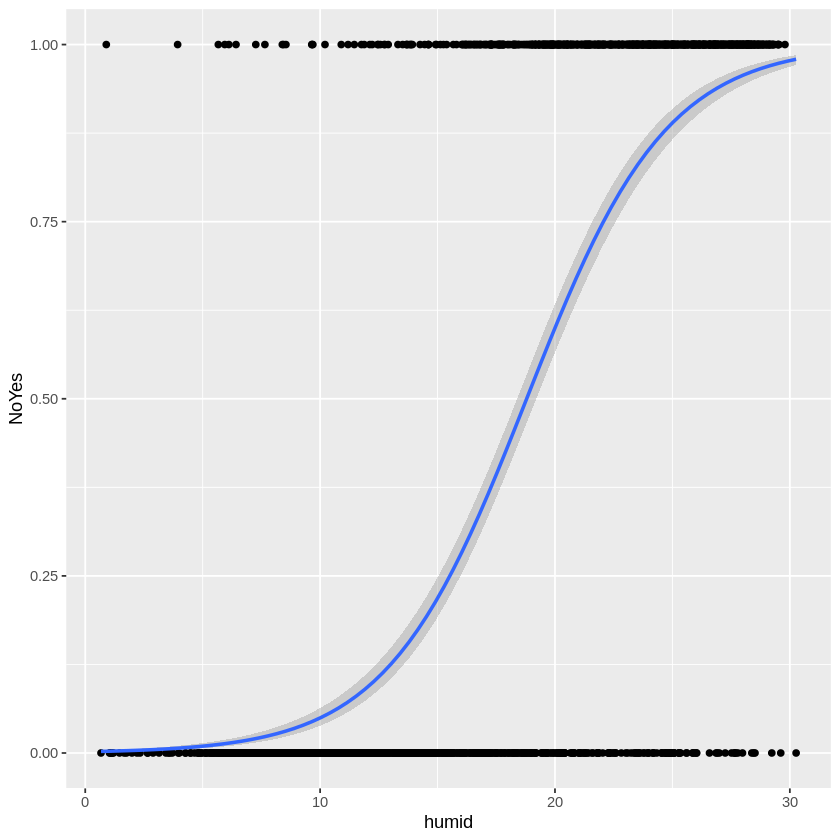

In [11]:
mb <-glm(NoYes~humid, data = dengue, family = binomial)
summary(mb)

ggplot(dengue, aes(x=humid, y=NoYes)) + geom_point() + geom_smooth(method = "glm",
                                                                   method.args=list(family= "binomial"()))

Calculando a probabilidade de ter novos focos
Predizendo o valor baseado na nossa curva

In [12]:
hn <-data.frame(humid=23) 
predict(mb, hn, type = "response")

1 
0.8043118

# Novo modelo

In [13]:

options(scipen=30, digits=7) # colocando casas decimais


mb2 <- glm(NoYes~humid+temp, data=dengue, family=binomial)
summary(mb2)

hn2 <-data.frame(humid=15, temp=30)
predict(mb2, hn2, type = "response")


Call:
glm(formula = NoYes ~ humid + temp, family = binomial, data = dengue)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7240  -0.3912  -0.2006   0.4830   3.5471  

Coefficients:
            Estimate Std. Error z value            Pr(>|z|)    
(Intercept) -6.59219    0.30290 -21.764 <0.0000000000000002 ***
humid        0.30474    0.01985  15.350 <0.0000000000000002 ***
temp         0.03987    0.01933   2.063              0.0391 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2711.7  on 1997  degrees of freedom
Residual deviance: 1357.0  on 1995  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 1363

Number of Fisher Scoring iterations: 6


1 
0.3046832

# Decision boudaries 

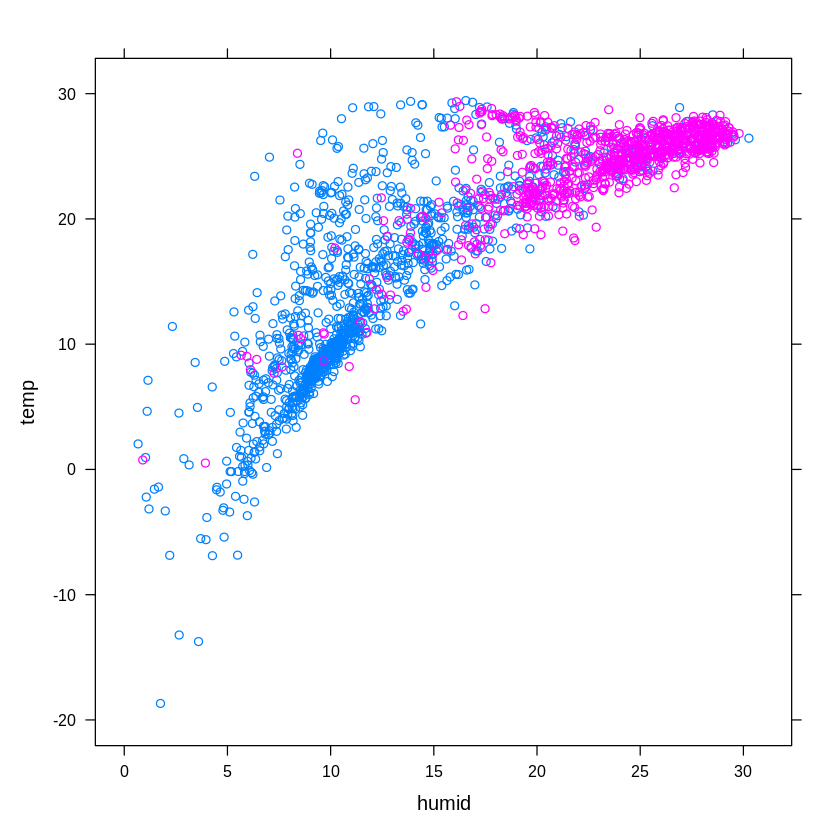

In [14]:
xyplot(temp~humid, data = dengue, groups=NoYes)

# Machine Learning

In [16]:
set.seed(123)  # Controlar a aleatoriedade
# Modelos de ML (caret)

# Cria um novo banco para remover os NA

In [19]:
dengue2 <-na.omit(dengue) # Remover células vazias (NA)
dataindex <-createDataPartition(dengue2$NoYes, p=.7, list = F) # Treino- o listnão alterar a estrutura do banco

dengueTreino <- dengue2[dataindex,]
dengueTeste <-dengue2[-dataindex,] # coloca o sinao de negativo (-)

# Classificador Dummy - Seleciona os valores mais comuns no bando de dados

In [20]:
maiscomum <-sum(dengueTreino$NoYes==1)/(dim(dengueTreino)[1])

if(maiscomum >=0.5){
  print("ClasseMaisComum <-1")
  ClasseMaisComum <- 1
} else {
  print("ClasseMaisComum <-0")
  ClasseMaisComum <- 0
}

taxadeAcerto<- sum(dengueTeste$NoYes == ClasseMaisComum)/(dim(dengueTeste)[1])

[1] "ClasseMaisComum <-0"



# Árvore de Decisão - Pacote Rattle



Modelo

In [21]:
modelo <-train(as.factor(NoYes)~humid, data = dengueTreino, 
               method = "rpart") #as.factor - Trnasforma em categorico 

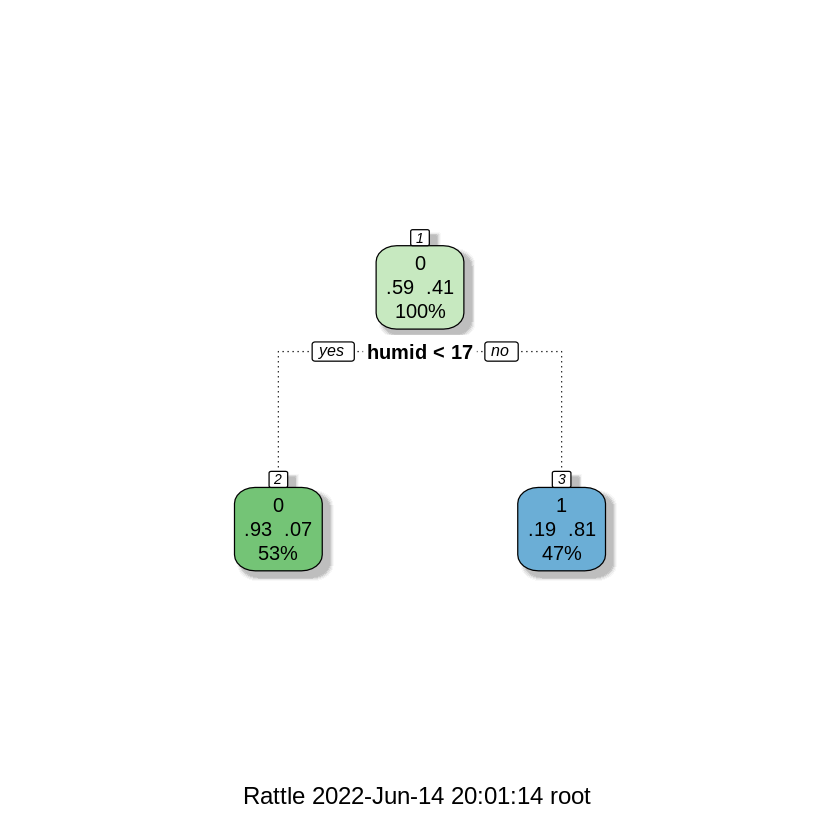

In [22]:
fancyRpartPlot(modelo$finalModel) # tem que colocar o finalmodel para pegar o ultimo

Modelo 2

In [23]:
modelo2 <-train(as.factor(NoYes)~temp, data = dengueTreino, 
               method = "rpart") #as.factor - Trnasforma em categorico 

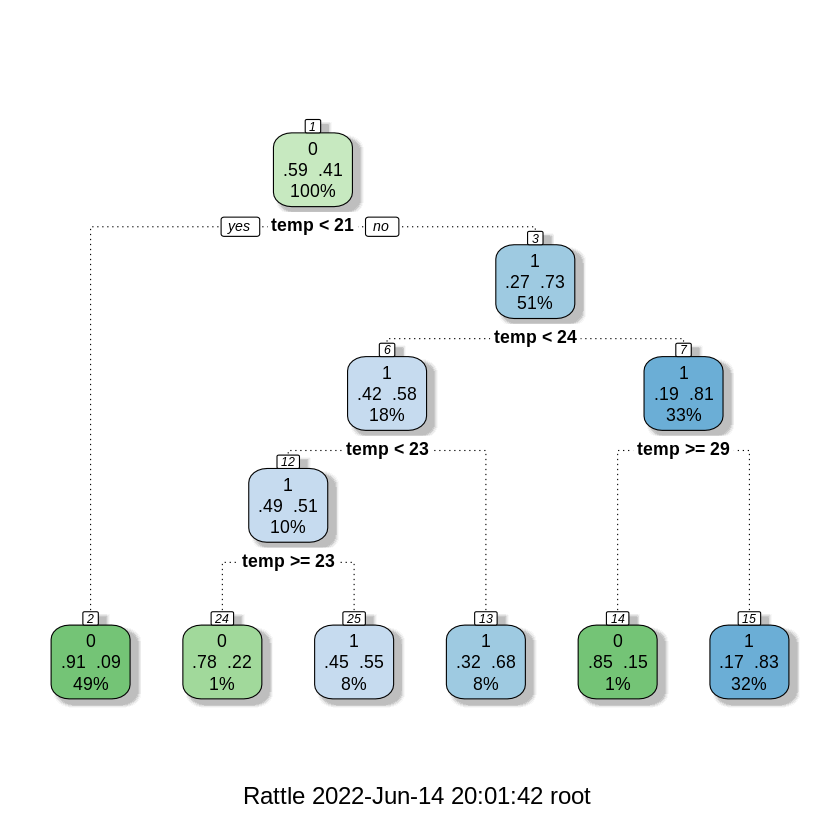

In [24]:
# comando para árvore de decisão
fancyRpartPlot(modelo2$finalModel)

Modelo 3


In [26]:
modelo3 <-train(as.factor(NoYes)~trees, data = dengueTreino, 
                method = "rpart") #as.factor - Trnasforma em categorico 

Comando para árvore de decisão

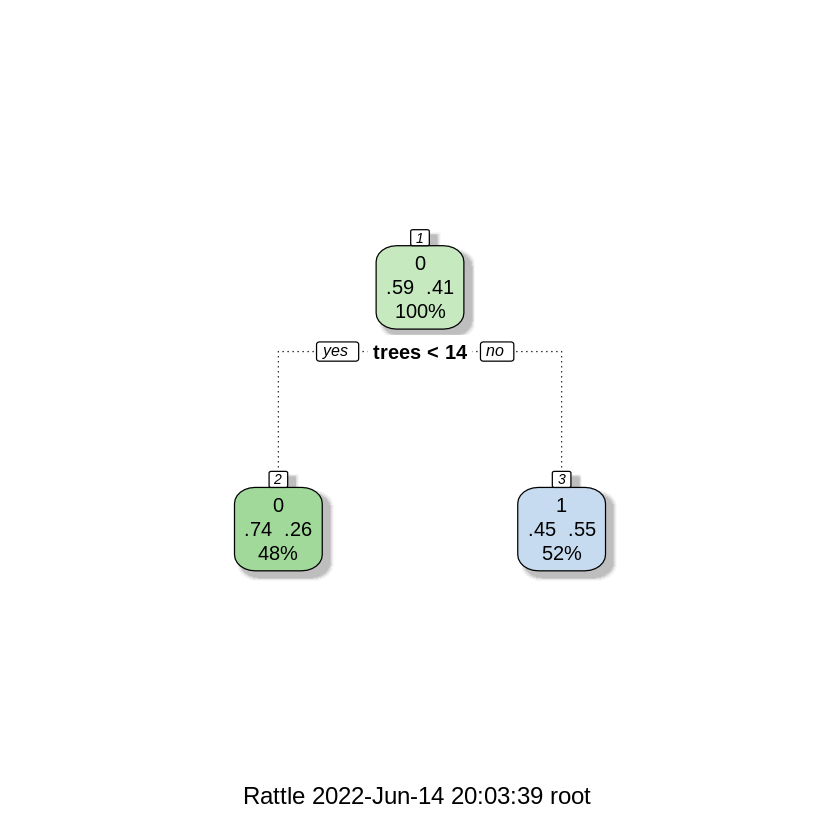

In [27]:
fancyRpartPlot(modelo3$finalModel)

# Modelos de classificação

In [36]:
modeloML1 <- train(as.factor(NoYes)~humid+trees+temp,data=dengueTreino,
                   method="glm")



In [40]:
modeloML2 <- train(as.factor(NoYes)~humid+trees+temp,data=dengueTreino,
                   method="ranger")



note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



In [38]:
modeloML3 <- train(as.factor(NoYes)~humid+trees+temp,data=dengueTreino,
                   method="bayesglm")

# Avaliando os modelos utilizando Matriz de confusão


In [43]:
pGLM <- predict(modeloML1, dengueTeste)


In [44]:
pRANGER <- predict(modeloML2, dengueTeste)


In [45]:
pBAYES <- predict(modeloML3, dengueTeste)



In [46]:
confusionMatrix(factor(pGLM), factor(dengueTeste$NoYes))     # Acuracia 0.8605 


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 299  37
         1  48 211
                                             
               Accuracy : 0.8571             
                 95% CI : (0.8264, 0.8843)   
    No Information Rate : 0.5832             
    P-Value [Acc > NIR] : <0.0000000000000002
                                             
                  Kappa : 0.708              
                                             
 Mcnemar's Test P-Value : 0.2781             
                                             
            Sensitivity : 0.8617             
            Specificity : 0.8508             
         Pos Pred Value : 0.8899             
         Neg Pred Value : 0.8147             
             Prevalence : 0.5832             
         Detection Rate : 0.5025             
   Detection Prevalence : 0.5647             
      Balanced Accuracy : 0.8562             
                                             
       'Positive

In [47]:
confusionMatrix(factor(pRANGER), factor(dengueTeste$NoYes))  # Acuracia 0.8622


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 303  38
         1  44 210
                                             
               Accuracy : 0.8622             
                 95% CI : (0.8318, 0.8889)   
    No Information Rate : 0.5832             
    P-Value [Acc > NIR] : <0.0000000000000002
                                             
                  Kappa : 0.7175             
                                             
 Mcnemar's Test P-Value : 0.5808             
                                             
            Sensitivity : 0.8732             
            Specificity : 0.8468             
         Pos Pred Value : 0.8886             
         Neg Pred Value : 0.8268             
             Prevalence : 0.5832             
         Detection Rate : 0.5092             
   Detection Prevalence : 0.5731             
      Balanced Accuracy : 0.8600             
                                             
       'Positive

In [48]:
confusionMatrix(factor(pBAYES), factor(dengueTeste$NoYes))   # Acuracia 0.8605

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 299  37
         1  48 211
                                             
               Accuracy : 0.8571             
                 95% CI : (0.8264, 0.8843)   
    No Information Rate : 0.5832             
    P-Value [Acc > NIR] : <0.0000000000000002
                                             
                  Kappa : 0.708              
                                             
 Mcnemar's Test P-Value : 0.2781             
                                             
            Sensitivity : 0.8617             
            Specificity : 0.8508             
         Pos Pred Value : 0.8899             
         Neg Pred Value : 0.8147             
             Prevalence : 0.5832             
         Detection Rate : 0.5025             
   Detection Prevalence : 0.5647             
      Balanced Accuracy : 0.8562             
                                             
       'Positive

# Cruva ROC e AUC

Setting levels: control = 0, case = 1

Setting direction: controls < cases



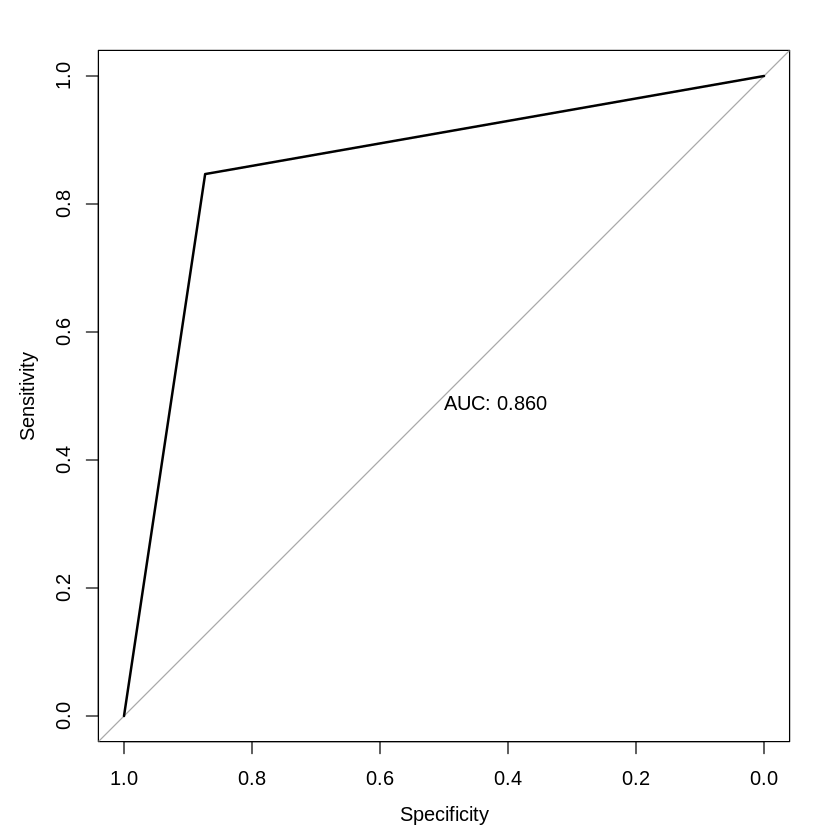

In [49]:
plot.roc(dengueTeste$NoYes,as.numeric(pRANGER), print.auc=T)


Setting levels: control = 0, case = 1

Setting direction: controls < cases



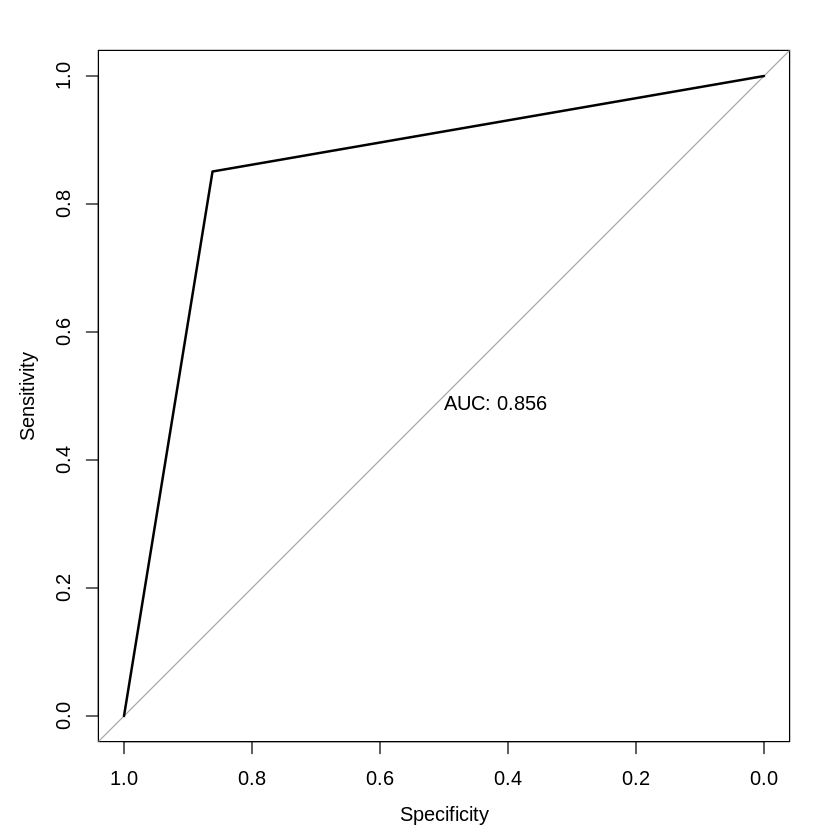

In [50]:
plot.roc(dengueTeste$NoYes,as.numeric(pGLM), print.auc=T)


Setting levels: control = 0, case = 1

Setting direction: controls < cases



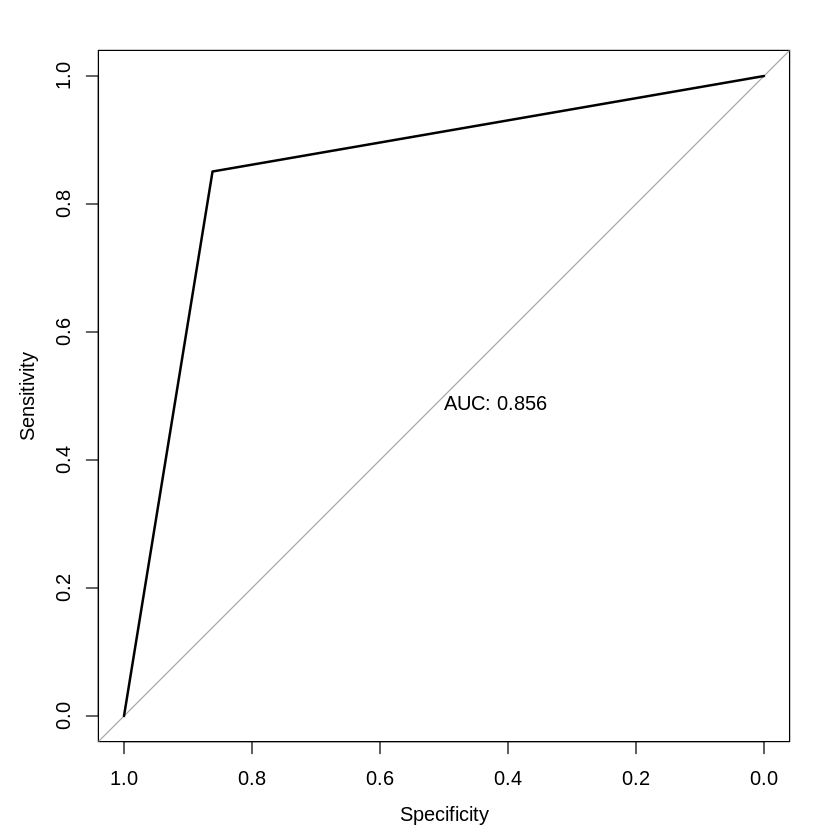

In [51]:
plot.roc(dengueTeste$NoYes,as.numeric(pBAYES), print.auc=T)

# Variáveis mais importantes no modelo
Semore que utilizarmos o Ranger, é importante verificar.

In [52]:
modeloML2 <- train(as.factor(NoYes)~humid+trees+temp,data=dengueTreino,
                   method="ranger", importance="impurity") # Add o argumento "importance", verificando a importancia das variaveis

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



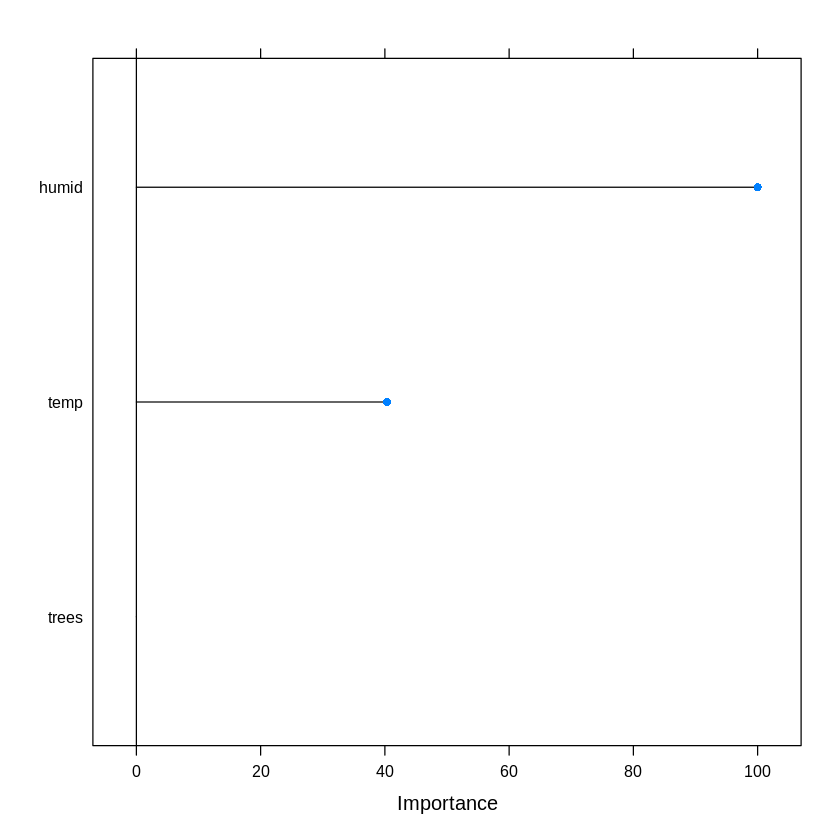

In [53]:
plot(varImp(modeloML2))

In [54]:
(varImp(modeloML2)) # Se remover o plot ele plota os numeros

ranger variable importance

      Overall
humid  100.00
temp    40.32
trees    0.00

In [ ]:

# CONCLUSÃO

A variável humidade foi a mais importante no nosso modelo. 
